# 2.1 - Intro Machine Learning


![venn_ml](images/venn_ml.png)

![ext_sklearn](images/ext_sklearn.jpeg)

![sklearn](images/sklearn.png)



### WorkFlow

+ Obtener datos
+ Definir objetivo
+ Limpieza de datos (unidades, outliers, one-hot, etc..)
+ Definir modelo (regresión, clasificación, ...)
+ Entrenar (hiperparámetros, validación, ...) (**)
+ Predecir (testear)
+ Evaluar
+ Si hay mucho error volver a (**)

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import pylab as plt
%matplotlib inline

In [2]:
# obtener datos

census=pd.read_csv('data/census.csv')

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.describe().T

,count,mean,std,min,25%,50%,75%,max
CensusId,3220.0,31393.605280,16292.078954,1001.0,19032.50,30024.00,46105.500,72153.0
TotalPop,3220.0,99409.345963,319305.453731,85.0,11218.00,26035.00,66430.500,10038388.0
Men,3220.0,48896.937888,156681.276856,42.0,5637.25,12932.00,32992.750,4945351.0
Women,3220.0,50512.408075,162661.952823,43.0,5572.00,13057.00,33487.500,5093037.0
Hispanic,3220.0,11.011522,19.241380,0.0,1.90,3.90,9.825,99.9
White,3220.0,75.428789,22.932890,0.0,64.10,84.10,93.200,99.8
Black,3220.0,8.665497,14.279122,0.0,0.50,1.90,9.600,85.9
Native,3220.0,1.723509,7.253115,0.0,0.10,0.30,0.600,92.1
Asian,3220.0,1.229068,2.633079,0.0,0.20,0.50,1.200,41.6
Pacific,3220.0,0.082733,0.734931,0.0,0.00,0.00,0.000,35.3


In [4]:
census.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

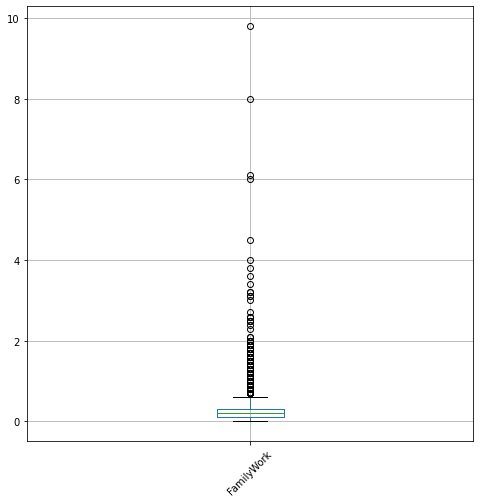

In [5]:
# outliers (Test de Tukey - 1.5·IQR)

plt.figure(figsize=(8, 8))

census.boxplot(column=['FamilyWork'])

plt.xticks(rotation=45);

In [6]:
q1=np.percentile(census.FamilyWork, 25)

q3=np.percentile(census.FamilyWork, 75)

In [7]:
iqr=q3-q1

# 3IQR

upper = q3 + 3*iqr

lower = q1 - 3*iqr

In [8]:
len(census[census.FamilyWork<lower])

0

In [9]:
census.shape

(3220, 37)

In [10]:
census=census[census.FamilyWork<upper] # aqui he filtrado los que son memnores que 3 veces iqr mas q3

In [11]:
census.shape

(3022, 37)

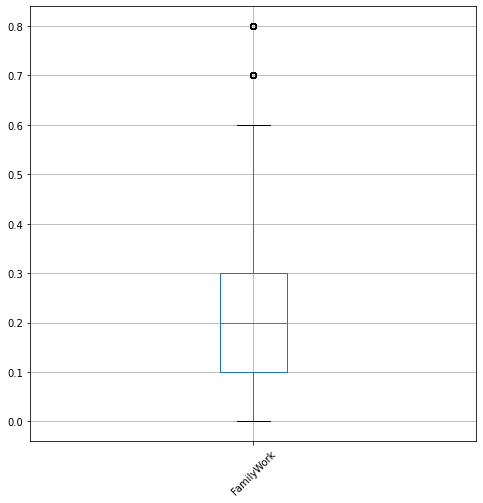

In [12]:
plt.figure(figsize=(8, 8))

census.boxplot(column=['FamilyWork'])

plt.xticks(rotation=45);

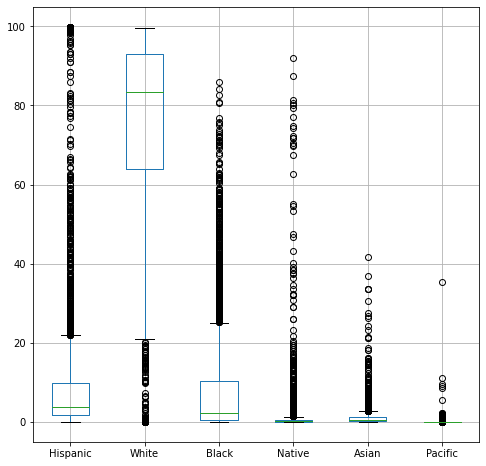

In [13]:
plt.figure(figsize=(8, 8))


census[['Hispanic','White', 'Black', 'Native', 'Asian', 'Pacific']].boxplot();

In [14]:
# reescalado [0, 1]

def escala(x):
    return (x/100).round(3)

In [15]:
conversion=['Hispanic','White', 'Black', 'Native',
            'Asian', 'Pacific', 'Poverty', 'ChildPoverty',
            'Service', 'Office']

In [16]:
n_columnas=[x+'Rate' for x in conversion]

census[n_columnas]=census[conversion].apply(escala)

census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239


In [17]:
# normalizacion

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [18]:
census['TotalPopScale']=RobustScaler().fit_transform(census.TotalPop.values.reshape(-1, 1))

In [19]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate,TotalPopScale
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242,0.446361
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271,2.790117
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231,-0.027567
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178,-0.100075
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239,0.488059


In [20]:
# variables categoricas

# one-hot encoding / get dummies (variable dummie) (onehotencoder esta en sklearn, get dummies en pandas)
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

state=pd.get_dummies(census.State, drop_first=True)

census=pd.concat([census, state], axis=1)

census.tail()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate,TotalPopScale,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,0.0,0.0,43656,16948.0,1234.0,9102,538,48.5,56.1,30.1,21.6,24.7,9.2,14.3,89.1,7.1,0.9,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2,0.964,0.034,0.001,0.0,0.000,0.0,0.485,0.561,0.216,0.247,0.473786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,0.0,0.0,7085,18104.0,3771.0,8821,939,39.1,58.1,18.4,38.2,18.5,15.7,9.1,69.1,17.8,1.0,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2,0.967,0.029,0.000,0.0,0.000,0.0,0.391,0.581,0.382,0.185,-0.325806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,0.0,0.0,18458,17818.0,1255.0,8420,486,54.0,68.3,23.6,21.0,21.8,13.9,19.7,82.0,11.4,0.1,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9,0.997,0.000,0.000,0.0,0.000,0.0,0.540,0.683,0.210,0.218,-0.065211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,0.1,0.0,27924,15627.0,1836.0,7960,512,52.3,62.1,25.9,25.9,20.7,12.8,14.7,86.0,7.9,0.0,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3,0.998,0.002,0.000,0.0,0.001,0.0,0.523,0.621,0.259,0.207,0.129024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3219,72153,Puerto Rico,Yauco,39474,19047,20427,99.5,0.5,0.0,0.0,0.0,0.0,30661,14708.0,1245.0,7743,474,51.7,56.3,28.1,20.5,26.7,14.2,10.5,84.8,8.5,1.2,1.6,0.7,3.1,24.6,8923,68.0,27.6,4.4,0.0,27.1,0.995,0.005,0.000,0.0,0.000,0.0,0.517,0.563,0.205,0.267,0.182550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
len(census.County.unique())

1827

In [22]:
#census.info(memory_usage='deep')

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

# son para cosas con orden o escala

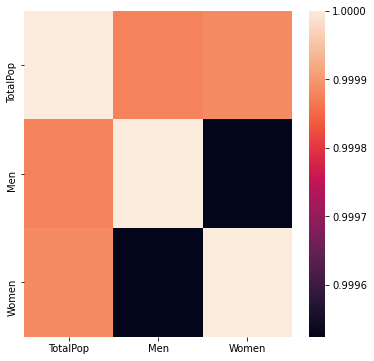

In [24]:
# colinealidad

import seaborn as sns

plt.figure(figsize=(6, 6))

sns.heatmap(census[['TotalPop', 'Men', 'Women']].corr());

In [25]:
# borrar columnas innecesarias

census=census.drop(columns=['State', 'County', 'Men', 'Women', 'CensusId', 
                            'Citizen', 'Employed', 'IncomeErr', 'IncomePerCapErr','TotalPopScale' # estas borradas despues
                           ])

In [26]:
census=census.dropna()

**Hasta aqui, los datos se suponen limpios y tratados**

In [27]:
# diferenciar datos, variables indep y la dep.
# Aqui se define el objetivo, en este caso predecir la poblacion

X=census.drop('TotalPop', axis=1)

y=census.TotalPop

In [28]:
# train test split

from sklearn.model_selection import train_test_split as tts

In [29]:
train, test = tts(census)

train.shape, test.shape

((2265, 89), (755, 89))

In [30]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2416, 88), (604, 88), (2416,), (604,))

# El MODELO

In [32]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score, mean_squared_error 

In [33]:
linreg=LinReg()

linreg.fit(X_train, y_train)

LinearRegression()

In [34]:
linreg.coef_[:10]

array([-2.28328919e+12, -8.16782253e+03, -4.37252173e+03, -4.67556934e+03,
        2.54736792e+04,  1.65401616e+04, -5.26025391e+00,  2.18994141e+00,
       -4.70132910e+03,  1.53601465e+03])

In [35]:
linreg.intercept_

-6575822.718024703

In [36]:
y_pred=linreg.predict(X_test)

y_pred[:10]

array([ -26751.5019786 ,   52921.56580418, 1014327.06877466,
        -25188.82288163,  141167.05964976,  148737.53762628,
        -13227.90279803,  119289.82585427,   73424.22891338,
         81983.67265736])

In [37]:
y_pred.shape==y_test.shape

True

In [38]:
r2_score(y_test, y_pred)

0.253110907092439

In [39]:
mean_squared_error(y_test, y_pred, squared=False)

411828.87805184396

In [40]:
census.head()

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,55221,2.6,75.8,18.5,0.4,1.0,0.0,51281.0,24974,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,195121,4.5,83.1,9.5,0.6,0.7,0.0,50254.0,27317,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26932,4.6,46.2,46.7,0.2,0.4,0.0,32964.0,16824,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,71.8,20.8,7.3,0.1,17.6,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22604,2.2,74.5,21.4,0.4,0.1,0.0,38678.0,18431,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,76.8,16.1,6.7,0.4,8.3,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,57710,8.6,87.9,1.5,0.3,0.1,0.0,45813.0,20532,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,82.0,13.5,4.2,0.4,7.7,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
census.TotalPop.mean(), census.TotalPop.std()

(105450.13410596027, 328813.9992300909)

In [42]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [43]:
rfr=RFR(n_estimators=200)

rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [44]:
#help(rfr)

In [45]:
y_pred=rfr.predict(X_test)

y_pred[:10]

array([  12398.08 ,   19808.7  , 1185857.285,   64569.71 ,  187235.44 ,
         64614.635,   26102.685,   43493.43 ,   23967.33 ,  109591.595])

In [46]:
r2_score(y_test, y_pred)

0.34900269722278277

In [47]:
mean_squared_error(y_test, y_pred, squared=False)

384484.05397637567

### Feature Extraction and Engineering

In [48]:
import zipfile

In [49]:
zf=zipfile.ZipFile('data/mahindra.zip')

ctr=pd.read_csv(zf.open('test.csv'), nrows=1e5)

ctr.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,3,4,1,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,1,4,8,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,2,2,3,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,1,2,3,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,2,3,8,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [50]:
ctr.shape

(100000, 23)

In [51]:
# optimizar la memoria

ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   reservation_id            100000 non-null  object 
 1   booking_date              100000 non-null  object 
 2   checkin_date              100000 non-null  object 
 3   checkout_date             100000 non-null  object 
 4   channel_code              100000 non-null  int64  
 5   main_product_code         100000 non-null  int64  
 6   numberofadults            100000 non-null  int64  
 7   numberofchildren          100000 non-null  int64  
 8   persontravellingid        100000 non-null  int64  
 9   resort_region_code        100000 non-null  int64  
 10  resort_type_code          100000 non-null  int64  
 11  room_type_booked_code     100000 non-null  int64  
 12  roomnights                100000 non-null  int64  
 13  season_holidayed_code     99975 non-null   fl

In [52]:
for e in ctr.select_dtypes('object').columns:
    
    ctr[e]=ctr[e].astype('category')
    
ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   reservation_id            100000 non-null  category
 1   booking_date              100000 non-null  category
 2   checkin_date              100000 non-null  category
 3   checkout_date             100000 non-null  category
 4   channel_code              100000 non-null  int64   
 5   main_product_code         100000 non-null  int64   
 6   numberofadults            100000 non-null  int64   
 7   numberofchildren          100000 non-null  int64   
 8   persontravellingid        100000 non-null  int64   
 9   resort_region_code        100000 non-null  int64   
 10  resort_type_code          100000 non-null  int64   
 11  room_type_booked_code     100000 non-null  int64   
 12  roomnights                100000 non-null  int64   
 13  season_holidayed_code     9997

In [53]:
for e in ctr.select_dtypes('integer').columns:
    
    ctr[e]=pd.to_numeric(ctr[e], downcast='integer')
    
ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   reservation_id            100000 non-null  category
 1   booking_date              100000 non-null  category
 2   checkin_date              100000 non-null  category
 3   checkout_date             100000 non-null  category
 4   channel_code              100000 non-null  int8    
 5   main_product_code         100000 non-null  int8    
 6   numberofadults            100000 non-null  int8    
 7   numberofchildren          100000 non-null  int8    
 8   persontravellingid        100000 non-null  int16   
 9   resort_region_code        100000 non-null  int8    
 10  resort_type_code          100000 non-null  int8    
 11  room_type_booked_code     100000 non-null  int8    
 12  roomnights                100000 non-null  int8    
 13  season_holidayed_code     9997

In [54]:
for e in ctr.select_dtypes('float').columns:
    
    ctr[e]=pd.to_numeric(ctr[e], downcast='float')
    
ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   reservation_id            100000 non-null  category
 1   booking_date              100000 non-null  category
 2   checkin_date              100000 non-null  category
 3   checkout_date             100000 non-null  category
 4   channel_code              100000 non-null  int8    
 5   main_product_code         100000 non-null  int8    
 6   numberofadults            100000 non-null  int8    
 7   numberofchildren          100000 non-null  int8    
 8   persontravellingid        100000 non-null  int16   
 9   resort_region_code        100000 non-null  int8    
 10  resort_type_code          100000 non-null  int8    
 11  room_type_booked_code     100000 non-null  int8    
 12  roomnights                100000 non-null  int8    
 13  season_holidayed_code     9997

In [55]:
ctr.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,3,4,1,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,1,4,8,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,2,2,3,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,1,2,3,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,2,3,8,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


**Binning**

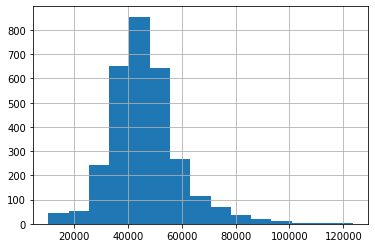

In [56]:
census.Income.hist(bins=15);

In [57]:
pd.cut(census.Income, 3).value_counts() # np.linspace(min, max, 3)

(10386.046, 48150.333]    1847
(48150.333, 85801.667]    1132
(85801.667, 123453.0]       41
Name: Income, dtype: int64

In [58]:
pd.qcut(census.Income, [0, 1/4, 1/2, 3/4, 1]).value_counts() # va por quantiles

(10498.999, 38246.0]    755
(38246.0, 44940.0]      755
(44940.0, 52221.75]     755
(52221.75, 123453.0]    755
Name: Income, dtype: int64

In [59]:
# nuevas Caracteristicas

# umemployment-income

# si el desempleo es mayor a 0.07 y tiene poco ingreso....

census['UI']=np.where((census.Unemployment>0.07)&(pd.qcut(census.Income, [0, 1/3, 2/3, 1]).cat.codes==0), 'a', 1)

census.head()

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,ChildPovertyRate,ServiceRate,OfficeRate,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,UI
0,55221,2.6,75.8,18.5,0.4,1.0,0.0,51281.0,24974,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,0.0,0.129,0.186,0.170,0.242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,195121,4.5,83.1,9.5,0.6,0.7,0.0,50254.0,27317,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,0.0,0.134,0.192,0.177,0.271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,26932,4.6,46.2,46.7,0.2,0.4,0.0,32964.0,16824,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,71.8,20.8,7.3,0.1,17.6,0.046,0.462,0.467,0.002,0.004,0.0,0.267,0.453,0.161,0.231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,a
3,22604,2.2,74.5,21.4,0.4,0.1,0.0,38678.0,18431,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,76.8,16.1,6.7,0.4,8.3,0.022,0.745,0.214,0.004,0.001,0.0,0.168,0.279,0.179,0.178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,a
4,57710,8.6,87.9,1.5,0.3,0.1,0.0,45813.0,20532,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,82.0,13.5,4.2,0.4,7.7,0.086,0.879,0.015,0.003,0.001,0.0,0.167,0.272,0.141,0.239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


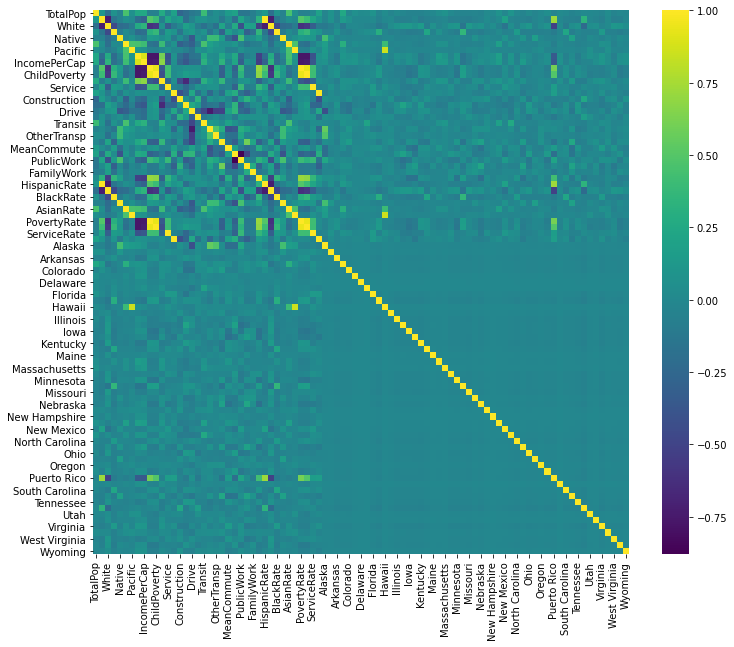

In [60]:
# colinealidad

plt.figure(figsize=(12, 10))

sns.heatmap(census.corr(), cmap='viridis');

In [61]:
from sklearn.feature_selection import RFE # recursive feature elimination

In [62]:
features=['Poverty', 'WorkAtHome', 'SelfEmployed', 'Black', 
          'Native', 'Asian', 'Pacific', 'Hispanic', 'IncomePerCap']

target='Unemployment'

In [63]:
X_train, X_test, y_train, y_test = tts(census[features], census[target])

In [64]:
modelo=RFR()

In [65]:
# recursive feature elimination

selector=RFE(modelo, n_features_to_select=4, step=2)

In [66]:
# entrenar a traves del RFE

selector.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=4, step=2)

In [67]:
selector.ranking_  # escala de 1 a n, 1 es lo mas importante con respecto de la y

array([1, 3, 1, 1, 3, 4, 4, 2, 1])

In [68]:
[features[i] for i,e in enumerate(selector.support_) if e] # las mas importantes

['Poverty', 'SelfEmployed', 'Black', 'IncomePerCap']

In [69]:
X_train_s, X_test_s, y_train_s, y_test_s = tts(census[[features[i] for i,e in enumerate(selector.support_) if e]], 
                                       census[target])

In [70]:
modelo=RFR()

rfr.fit(X_train_s, y_train_s)
y_pred=rfr.predict(X_test_s)

y_pred[:10]

array([23.9745,  9.512 ,  5.8495,  8.8045, 11.5935,  2.412 ,  8.899 ,
       10.5035, 11.9675,  7.0995])

In [71]:
# selecciona las importantes que dice el modelo

from sklearn.feature_selection import SelectFromModel as SFM

In [72]:
modelo=RFR()

selector=SFM(modelo, threshold=0.25)
selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(), threshold=0.25)

In [73]:
modelo.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
modelo.feature_importances_

array([0.47430794, 0.05246189, 0.08407424, 0.07847115, 0.04010636,
       0.03796889, 0.01270849, 0.05607393, 0.16382713])

In [75]:
sum(modelo.feature_importances_)

0.9999999999999999

In [76]:
list(zip(features, modelo.feature_importances_))

[('Poverty', 0.47430793519131276),
 ('WorkAtHome', 0.05246189246071447),
 ('SelfEmployed', 0.08407423881686807),
 ('Black', 0.07847114514015965),
 ('Native', 0.04010635679794145),
 ('Asian', 0.03796888607648434),
 ('Pacific', 0.012708490073939522),
 ('Hispanic', 0.05607392801040293),
 ('IncomePerCap', 0.16382712743217687)]

### Problema de Cancer

In [77]:
from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as cm

from imblearn.over_sampling import SMOTE # oversampling

In [78]:
#load_breast_cancer()['DESCR'].split('\n')

In [79]:
data=pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)

data['target']=load_breast_cancer().target

In [80]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [81]:
X=data.drop(columns=['target'])
y=data.target

In [82]:
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

In [83]:
rfc=RFC()
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

acc(y_pred, y_test)

0.965034965034965

In [84]:
cm(y_pred, y_test)

array([[51,  2],
       [ 3, 87]])

In [85]:
data.shape

(569, 31)

In [86]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [87]:
data_clean=data[['mean radius', 'mean symmetry', 'mean texture', 'target']]

X=data_clean.drop(columns=['target'])
y=data_clean.target

X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

rfc=RFC()
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

acc(y_pred, y_test)

0.9300699300699301

In [88]:
cm(y_pred, y_test)

array([[47,  3],
       [ 7, 86]])

In [89]:
data_clean.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [90]:
from imblearn.over_sampling import SMOTE  # oversampling

#https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [91]:
smote=SMOTE()

X_s, y_s=smote.fit_resample(X,y)

X_train, X_test, y_train, y_test=tts(X_s, y_s, random_state=42, test_size=0.25)

In [92]:
pd.DataFrame(y_s).value_counts()

target
0         357
1         357
dtype: int64

In [93]:
rfc=RFC(n_estimators=300)


rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

acc(y_test, y_pred)


0.9106145251396648

In [94]:
cm(y_pred, y_test)

array([[84,  7],
       [ 9, 79]])

In [95]:
rfc=RFC(n_estimators=300)


rfc.fit(X_train, y_train)

y_pred=rfc.predict(X)

acc(y, y_pred)

0.9806678383128296

In [96]:
cm(y_pred, y)

array([[209,   8],
       [  3, 349]])